In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from PIL import Image
from IPython.core.display import HTML
from functools import partial

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.gqa import create_prompt

/home/enhao/miniconda3/envs/visprog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
interpreter = ProgramInterpreter(dataset='gqa')

Registering LOC step
Registering COUNT step
Registering CROP step
Registering CROP_RIGHTOF step
Registering CROP_LEFTOF step
Registering CROP_FRONTOF step
Registering CROP_INFRONTOF step
Registering CROP_INFRONT step
Registering CROP_BEHIND step
Registering CROP_AHEAD step
Registering CROP_BELOW step
Registering CROP_ABOVE step
Registering VQA step
Registering EVAL step
Registering RESULT step


In [5]:
prompter = partial(create_prompt,method='all')
generator = ProgramGenerator(prompter=prompter)

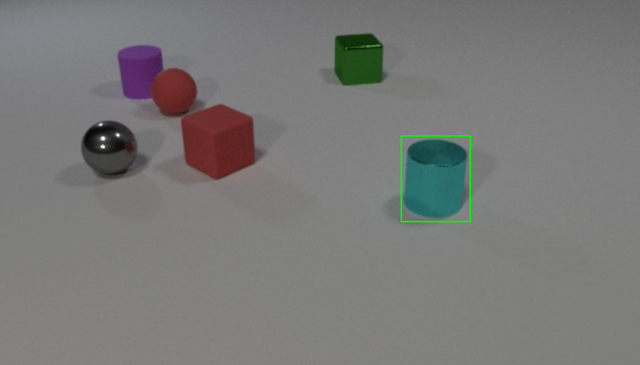

In [6]:
image = Image.open('../assets/clevrer1.png')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [13]:
# question = "How many people or animals are in the image?"
question = "Is there a red ball behind a red cube in the image?"
# question = "Is there a red ball close to a red cube in the image?"
# question = "Is there a red cube on the left and a green cube on the right in the image?"
# question = "Are there more animals than people in the image?"
# question = "Localize the woman and tell me the color of her dress."
# question = "Find and tell me the name of the animal in the image."
# question = "How many women are to the right of the camel?"
# question = "How many women are to the left of the camel?"
# question = "Is the lamp to the left of the woman lit?"
# question = "Is there a sun in the sky?"
prog,_ = generator.generate(dict(question=question))
print(prog)

BOX0=LOC(image=IMAGE,object='LEFT')
IMAGE0=CROP(image=IMAGE,box=BOX0)
BOX1=LOC(image=IMAGE0,object='red cube')
BOX2=LOC(image=IMAGE,object='RIGHT')
IMAGE1=CROP(image=IMAGE,box=BOX2)
BOX3=LOC(image=IMAGE1,object='green cube')
ANSWER0=COUNT(box=BOX1)
ANSWER1=COUNT(box=BOX3)
ANSWER2=EVAL(expr="'yes' if {ANSWER0} > 0 and {ANSWER1} > 0 else 'no'")
FINAL_RESULT=RESULT(var=ANSWER2)


In [14]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

LOC
CROP
LOC
LOC
CROP
LOC
COUNT
COUNT
EVAL
RESULT


In [15]:
result

'yes'


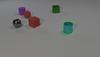
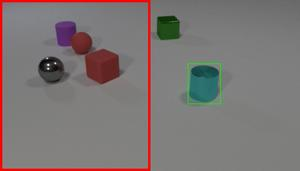
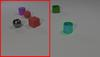
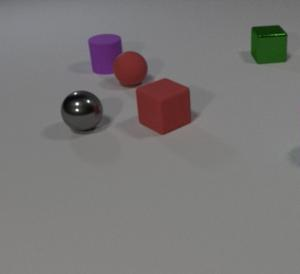
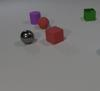
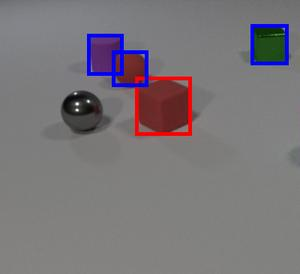
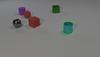
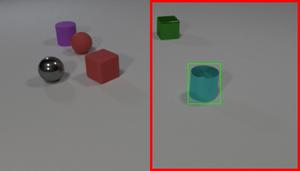
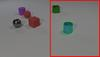
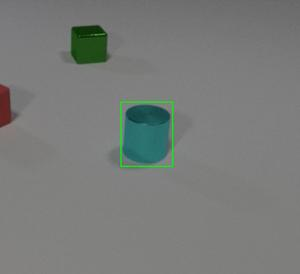
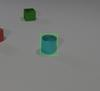
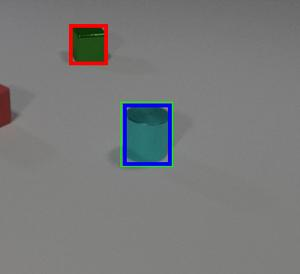
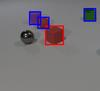
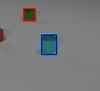

In [16]:
HTML(html_str)

'<hr><div><b><span style=\'color: blue;\'>BOX0</span></b>=<b><span style=\'color: red;\'>LOC</span></b>(<b><span style=\'color: darkorange;\'>image</span></b>=, <b><span style=\'color: darkorange;\'>object</span></b>=\'red cube\')=</div><hr><div><b><span style=\'color: blue;\'>IMAGE0</span></b>=<b><span style=\'color: red;\'>CROP_LEFTOF</span></b>(<b><span style=\'color: darkorange;\'>bbox</span></b>=)=</div><hr><div><b><span style=\'color: blue;\'>BOX1</span></b>=<b><span style=\'color: red;\'>LOC</span></b>(<b><span style=\'color: darkorange;\'>image</span></b>=, <b><span style=\'color: darkorange;\'>object</span></b>=\'red ball\')=</div><hr><div><b><span style=\'color: blue;\'>ANSWER0</span></b>=<b><span style=\'color: red;\'>COUNT</span></b>(<b><span style=\'color: darkorange;\'>bbox</span></b>=)=<b><span style=\'color: green;\'>1</span></b></div><hr><div><b><span style=\'color: blue;\'>ANSWER1</span></b>=<b><span style=\'color: red;\'>EVAL</span></b>(<b><span style=\'color: darkor
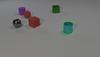
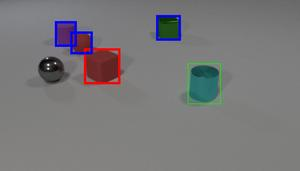
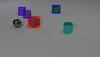
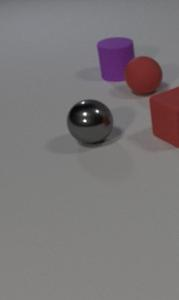
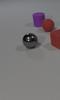
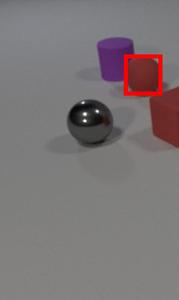
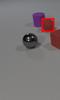

In [12]:
html_str